# Data as on the disk

In [12]:
from os.path import exists, join
import os
from glob import glob
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline
%pdb


Automatic pdb calling has been turned OFF


# SURREAL

[0 1]


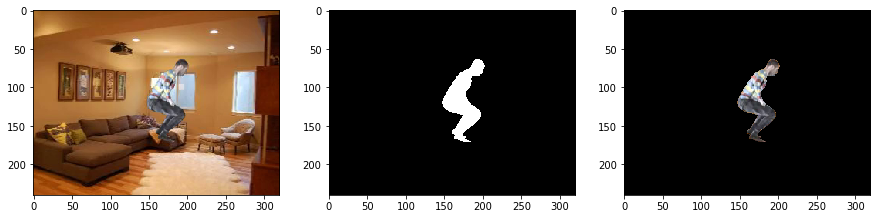

[0 1]


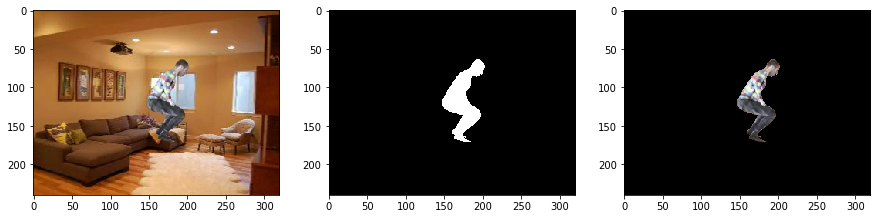

[0 1]


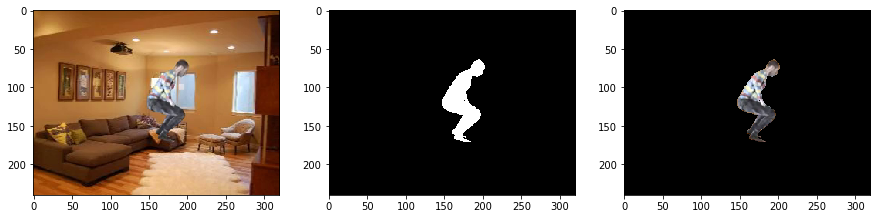

[0 1]


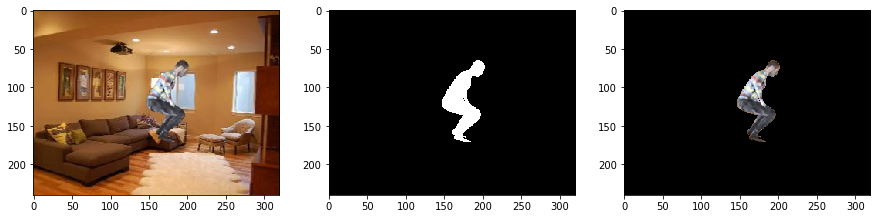

[0 1]


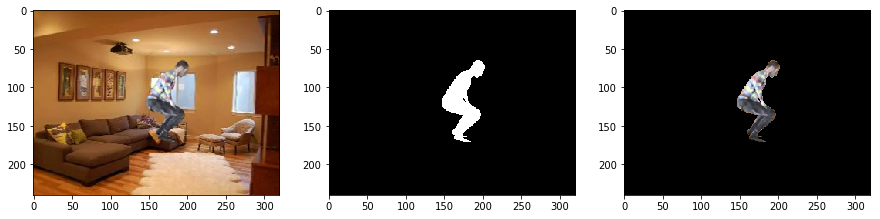

[0 1]


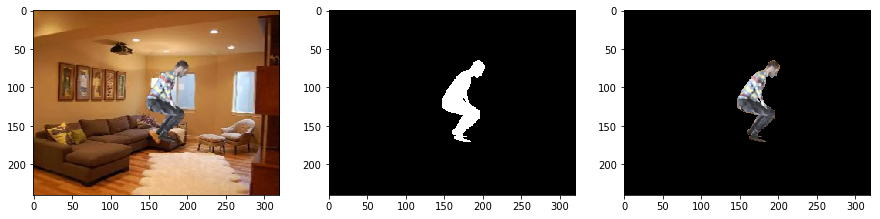

[0 1]


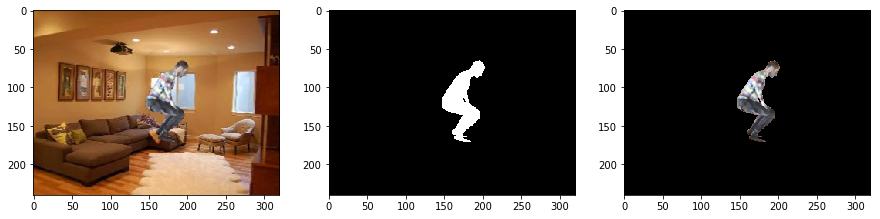

[0 1]


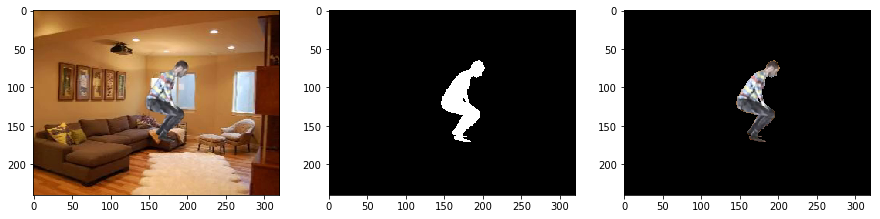

[0 1]


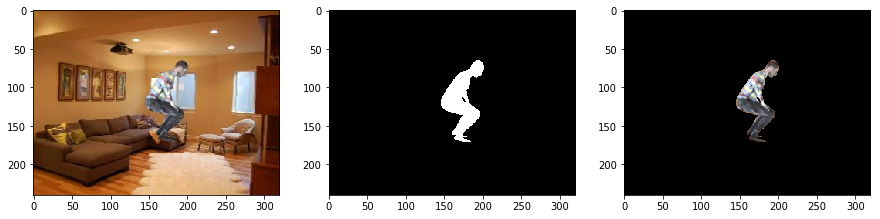

[0 1]


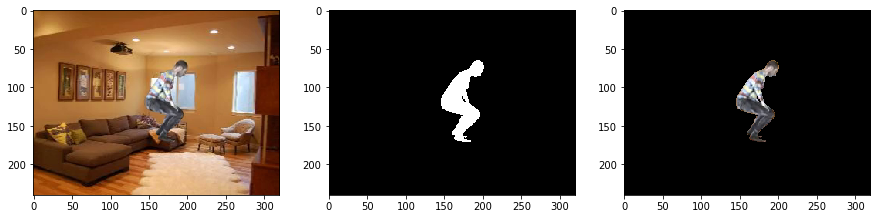

In [13]:
def imread(file):
    return cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2RGB)

root_dir = '/scratch/users/aditya/adult/SURREAL/surreal/download/SURREAL/data/surreal/train/run0/ung_94_16'

images = sorted(glob(join(root_dir, 'images', 'ung_94_16_c0009', '*')))
segmasks = sorted(glob(join(root_dir, 'segmasks', 'ung_94_16_c0009', '*')))

for i in range(len(images)):
    if i == 10:
        break
    print(np.unique(cv2.imread(segmasks[i])))
    
    plt.figure(figsize=(15, 15))
    plt.subplot(1, 3, 1)
    plt.imshow(imread(images[i]))
    
    
    plt.subplot(1, 3, 2)
    plt.imshow(cv2.imread(segmasks[i]) * 255)
    
    plt.subplot(1, 3, 3)
    plt.imshow(imread(images[i]) * cv2.imread(segmasks[i]))
    plt.show()
    
    

# MPI3DHP

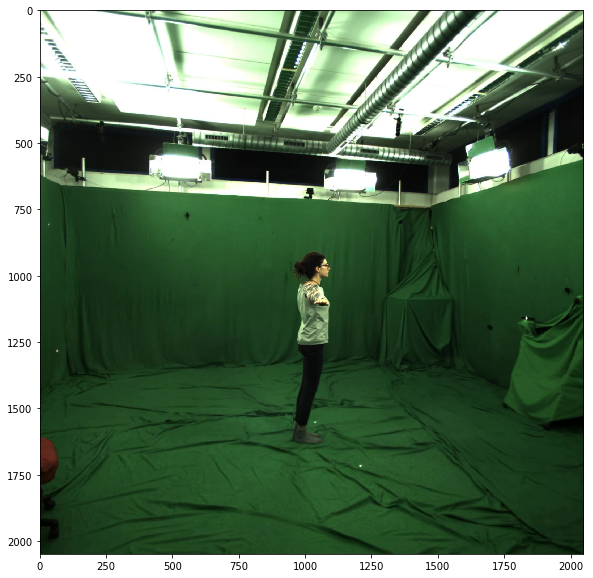

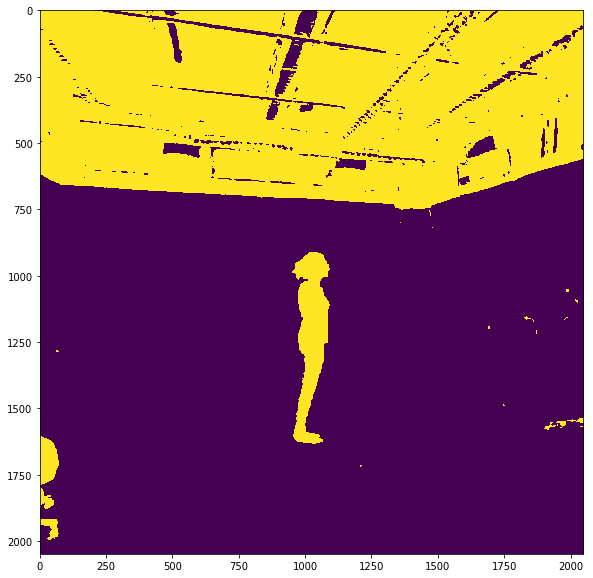

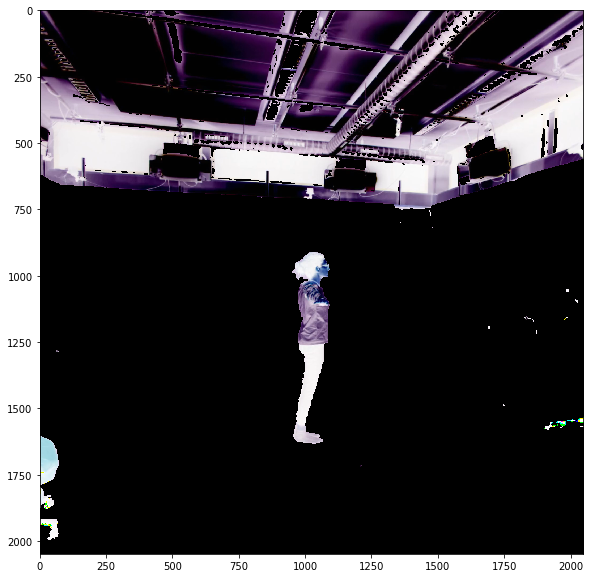

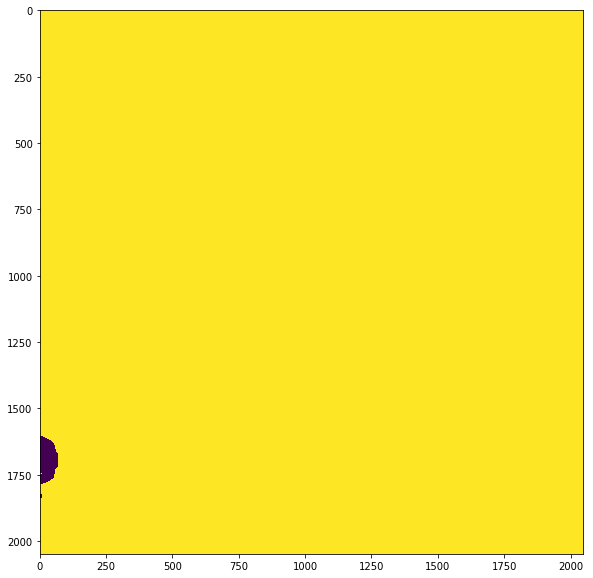

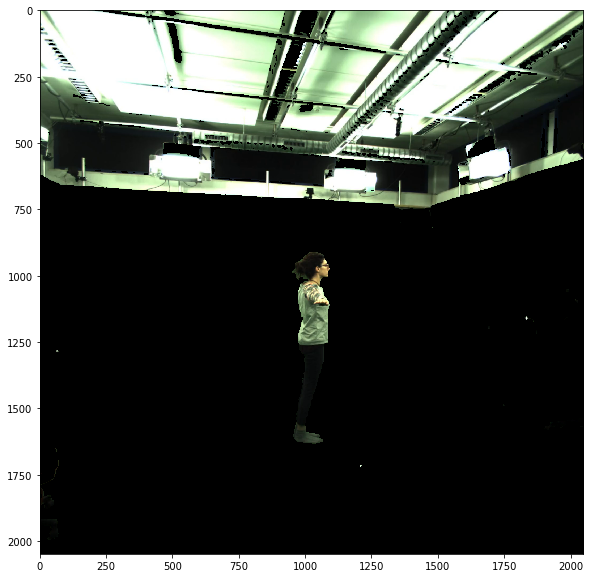

In [41]:
root_dir = '/scratch/users/aditya/adult/MPI3DHP/mpi_inf_3dhp'
subject = 'S1'
sequence = 'Seq1'

image_dir = join(root_dir, subject, sequence, 'imageSequence')
fgmask_dir = join(root_dir, subject, sequence, 'FGmasks')
chairmask_dir = join(root_dir, subject, sequence, 'ChairMasks')

images = sorted(glob(join(image_dir, 'video_0', '*')))
fgmasks = sorted(glob(join(fgmask_dir, 'video_0', '*')))
chairmasks = sorted(glob(join(chairmask_dir, 'video_0', '*')))

for i in range(len(images)):
    image = imread(images[i])
    
    fgmask = cv2.imread(fgmasks[0])
    fgmask = cv2.cvtColor(fgmask, cv2.COLOR_BGR2GRAY)
    ret, fgmask_thresh = cv2.threshold(fgmask, 65, 255,cv2.THRESH_BINARY)
    
    chairmask = cv2.imread(chairmasks[0])
    chairmask = cv2.cvtColor(chairmask, cv2.COLOR_BGR2GRAY)
    ret, chairmask_thresh = cv2.threshold(chairmask, 65, 255,cv2.THRESH_BINARY)
    
    plt.figure(figsize=(10, 10))
    #     plt.subplot(1, 5, 1)
    plt.imshow(image)
    plt.show()
    plt.figure(figsize=(10, 10))

    #     plt.subplot(1, 5, 2)
    plt.imshow(fgmask_thresh)
    plt.show()
    plt.figure(figsize=(10, 10))

    #     plt.subplot(1, 5, 3)
    plt.imshow(np.expand_dims(fgmask_thresh, 2) * image)
    plt.show()
    plt.figure(figsize=(10, 10))

    #     plt.subplot(1, 5, 4)
    plt.imshow(chairmask_thresh)
    plt.show()
    plt.figure(figsize=(10, 10))

    #     plt.subplot(1, 5, 5)
    plt.imshow(np.expand_dims(chairmask_thresh, 2) * np.expand_dims(fgmask_thresh, 2) * image)
    plt.show()
    
    break

# COCO